In [19]:
#import lib
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
#define variables
symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2024-12-31'
interval = '1d'

starting_balance = 10000
ma = 50

#download data
data = yf.download(symbol, start=start_date, end=end_date)

data


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.716064,72.776591,71.466805,71.721011,135480400
2020-01-03,72.009125,72.771752,71.783969,71.941336,146322800
2020-01-06,72.582901,72.621639,70.876068,71.127858,118387200
2020-01-07,72.241524,72.849201,72.021208,72.592571,108872000
2020-01-08,73.403648,73.706279,71.943759,71.943759,132079200
...,...,...,...,...,...
2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700


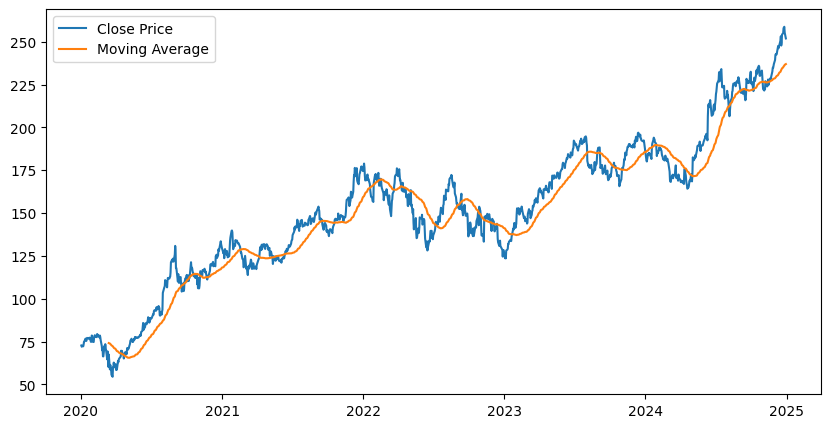

In [21]:
data['MA'] = data['Close'].rolling(window=ma).mean()

#plot data and visualize
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA'], label='Moving Average')
plt.legend()
plt.show()

In [22]:
#calculate Daily Return
data['Return'] = data.Close / data.Close.shift(1)
data.Return.iat[0] = 1
data['Bench_Bal'] = starting_balance * data.Return.cumprod()

first_timestap = data.index.min()
last_timestap = data.index.max()

# Calculate the number of years
years = (last_timestap - first_timestap).days / 365.25

data['Bench_Peak'] = data.Bench_Bal.cummax()
data['Bench_DD'] = data.Bench_Bal - data.Bench_Peak

cagr_bench = round((((data.Bench_Bal.iloc[-1] / data.Bench_Bal.iloc[0]) ** (1 / years)) - 1) * 100, 2)
cagr_bench

dd_bench = round(((data.Bench_DD / data.Bench_Peak).min()) * 100, 2)

print(f"Benchmark Annual Return: {cagr_bench}%")
print(f"Benchmark Max Drawdown: {dd_bench}%")

Benchmark Annual Return: nan%
Benchmark Max Drawdown: -31.43%


/var/folders/9r/ncvwhcbd1lz32g7k7rzdcxr00000gq/T/ipykernel_29160/3589714169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Return.iat[0] = 1
